In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
regr=linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error, r2_score
#cargamos los datos de entrada
data = pd.read_csv("temperatura.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(5, 2)

In [2]:
#5registros con 2 columnas. Veamos los registros
data.head()

,Temperatura,Voltaje de salida del sensor
0,20,2.0
1,30,4.0
2,60,5.0
3,80,6.5
4,100,8.0


#ecuaciones
y = mx + b

b = y - mx

In [3]:
x=data['Temperatura']
y=data['Voltaje de salida del sensor']
n = len(x)
x = np.array(x)
y = np.array(y)
sumax = sum(x)
sumay = sum(y)
sumax2 = sum(x*x)
sumay2 = sum(y*y)
sumaxy = sum(x*y)
promedio_x = sumax/n
promedio_y = sumay/n

#print(sumay)

m = (sumax*sumay - n*sumaxy)/(sumax**2 - n*sumax2)
b = promedio_y - m*promedio_x


#Termino independiente
#x = np.array([np.ones(5), x]).T
#print(x)
m,b

(0.0671875, 1.203125)

In [42]:
YY=m*50+b
print(YY)

4.5625


In [4]:
sigmax = np.sqrt(sumax2/n - promedio_x**2)
sigmay = np.sqrt(sumay2/n - promedio_y**2)
sigmaxy = sumaxy/n - promedio_x*promedio_y
R2 = (sigmaxy/(sigmax*sigmay))**2
R2

0.9539357311320765

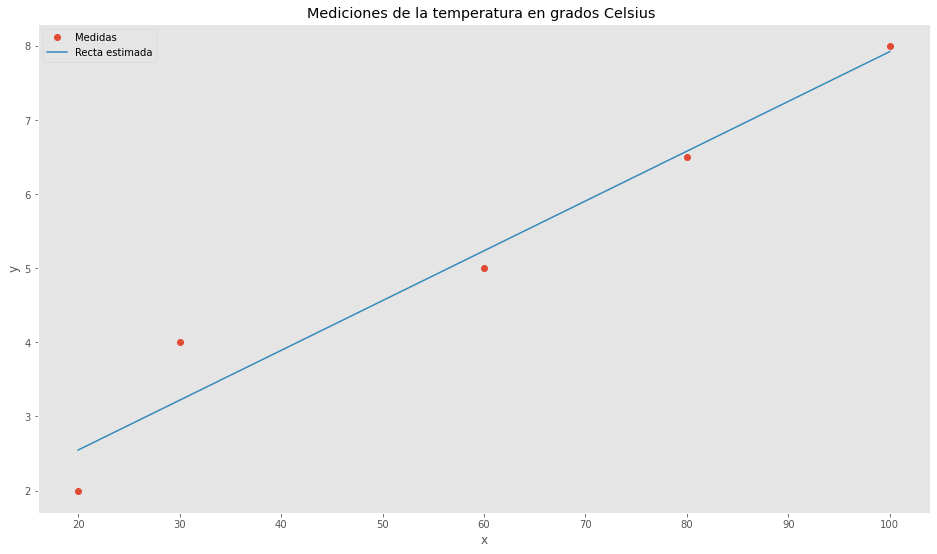

In [5]:
plt.plot(x,y, 'o', label='Medidas')
plt.plot(x,m*x+b, label='Recta estimada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mediciones de la temperatura en grados Celsius ')
plt.grid()
plt.legend()
plt.show()

In [33]:
#B = np.linalg.inv(x.T @ x) @ x.T @ y

In [13]:
dataframe = pd.DataFrame(data)
x=dataframe['Temperatura']
y=dataframe['Voltaje de salida del sensor']

In [41]:
X= x[:, np.newaxis]
#x = np.array(x)
#y = np.array(y)
#X= x[np.newaxis]
print(x)
print(regr.fit(X,y))
print(regr.coef_)
m=regr.coef_[0]
b=regr.intercept_
y_p=m*X+b
print('y={0}*X+{1}'.format(m,b))
print(regr.predict(X)[0:50])
print(r2_score(y, y_p))
print('Y=', 0.0671875*50+1.203125)

[ 20  30  60  80 100]
LinearRegression()
[0.0671875]
y=0.0671875*X+1.203125
[2.546875 3.21875  5.234375 6.578125 7.921875]
0.9539357311320755
Y= 4.5625
